In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout #Dense means normal layers (no convolutional).
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations
plt.rcParams['font.size'] = 14 #scale all the fonts in matplotlib to 14

%run nonlinear_function.py  #runs the non-linear function, we want to compare at the end the result of the DNN with the actual result
list_of_Trainloss_best_epoch=[0,0,0,0,0,0,0,0,0,0]
list_of_Validloss_best_epoch=[0,0,0,0,0,0,0,0,0,0]
list_of_best_index = [0,0,0,0,0,0,0,0,0,0]
list_of_Trainloss_last = [0,0,0,0,0,0,0,0,0,0]
list_of_Validloss_last = [0,0,0,0,0,0,0,0,0,0]

In [2]:
N_list = [9600 + i*3200 for i in range (0,10)]
print(N_list)
numcopies = 1 # numcopies = 2 gives us an augumented dataset of size 9600 points (because 9600 = 3200 + 2*3200). 
#When we increase it by 1 we go to the next element of the N_list array

[9600, 12800, 16000, 19200, 22400, 25600, 28800, 32000, 35200, 38400]


In [21]:
TYPE=1

#load the text from the files
x = np.loadtxt(filename("data", TYPE), delimiter = ' ')
y = np.loadtxt(filename("labels", TYPE), delimiter = ' ')

#Define the validation data, which will remain the same throughout. 

#The validation data and labels needs to be extracted from the generated data...
x_validation = x[0:800]
y_validation= y[0:800]

#...and ignored in the training set, so we remove the corresponding rows from the input data: 
x = np.delete(x, np.s_[0:800],axis=0)
y = np.delete(y, np.s_[0:800],axis=0)

#Check to see if everything is working properly
print('Lenght of traning data is: ', len(x))
print('Lenght of traning labels is: ', len(y))
print('Lenght of validation data is: ', len(x_validation))
print('Lenght of validation labels is: ', len(y_validation))

N = len(x)

# dim. of a sample
L = len(x[0])
print(N, L)

print('x1 min:', x[:,0].min(), 'x1 max:', x[:,0].max())
print('x2 min:', x[:,1].min(), 'x2 max:', x[:,1].max())
print(x)
print(x[2,1])

Lenght of traning data is:  3200
Lenght of traning labels is:  3200
Lenght of validation data is:  800
Lenght of validation labels is:  800
3200 2
x1 min: -49.837044318494996 x1 max: 49.95717914030824
x2 min: -49.94988774507294 x2 max: 49.99729118503266
[[ 16.53029359 -45.93330207]
 [-43.76645582  21.50247857]
 [  9.30025806  -2.67387951]
 ...
 [-44.2083343  -40.72185801]
 [ 18.94733403 -16.00021831]
 [ 25.87812692  27.47150871]]
-2.673879510920807


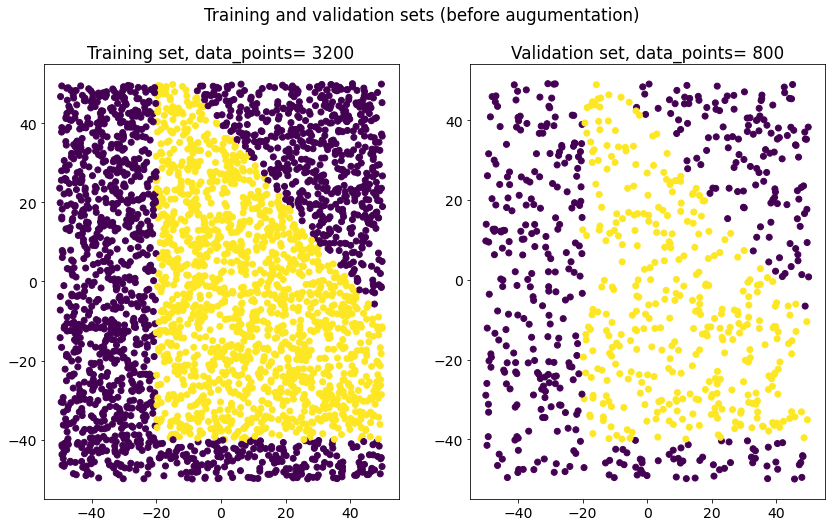

In [4]:
#Plot before doing anything
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,8))
fig.suptitle('Training and validation sets (before augumentation)')
ax1.scatter(x[:,0], x[:,1], c = y)
ax1.set_title('Training set, data_points= {}'.format(len(x)))
ax2.scatter(x_validation[:,0], x_validation[:,1], c = y_validation)
ax2.set_title('Validation set, data_points= {}'.format(len(x_validation)))
plt.show()

In [39]:
minimal_distance = []
distsinglepoint = []
for i in range(len(x)):
    for j in range(len(x)):
        if i!=j:
            d = np.sqrt((x[i,0]-x[j,0])**2 + (x[i,1]-x[j,1])**2)
            distsinglepoint.append(d) #distance between point i and j of the dataset
    minimal_distance.append(min(distsinglepoint))

steps = np.array(minimal_distance)*np.sqrt(2))/2
print(steps)


[0.79868649 0.79868649 0.54505964 ... 0.03133911 0.03133911 0.03133911]
3200
[0.79868649 0.80189724 0.54505964 ... 0.32900607 0.61512432 0.44236527]


In [6]:
print(len(x))
def CreateNewData(x, numcopies, y):
    first_new_x = np.empty((len(x),2))
    x_new = np.empty((len(x),2))
    first_new_y = np.append(y,y)
    for i in range(len(x)):
        first_new_x[i,0] = x[i,0] + np.random.uniform(low = -steps[i], high = steps[i])
        first_new_x[i,1] = x[i,1] + np.random.uniform(low = -steps[i], high = steps[i])
    for j in range(1, numcopies):
        for i in range(len(x)):
            x_new[i,0] = x[i,0] + np.random.uniform(low = -steps[i], high = steps[i])
            x_new[i,1] = x[i,1] + np.random.uniform(low = -steps[i], high = steps[i])
        temp = np.append(first_new_x, x_new, axis = 0)
        first_new_x = temp
        y_new = np.append(first_new_y,y)
        first_new_y = y_new
    return np.append(x,temp, axis = 0), y_new


print('This is the augumented dataset:\n', CreateNewData(x,numcopies,y)[0])


x_aug = CreateNewData(x,numcopies,y)[0]
y_aug = CreateNewData(x,numcopies,y)[1]
print(numcopies)
print(len(x_aug), len(y_aug))

3200
This is the augumented dataset:
 [[ 16.53029359 -45.93330207]
 [-43.76645582  21.50247857]
 [  9.30025806  -2.67387951]
 ...
 [-44.3819053  -40.45466535]
 [ 19.36818362 -16.21390107]
 [ 26.12204766  27.70714727]]
8
28800 28800


x1_aug min: -51.671568073256864 x1_aug max: 51.743670532141586
x2_aug min: -51.11367759355687 x2_aug max: 51.49569300508943
x1_aug_train min: -1.805700302862241 x1_aug_train max: 1.8001615373922852
x2_aug_train min: -1.7762003683334833 x2_aug_train max: 1.755747417011712


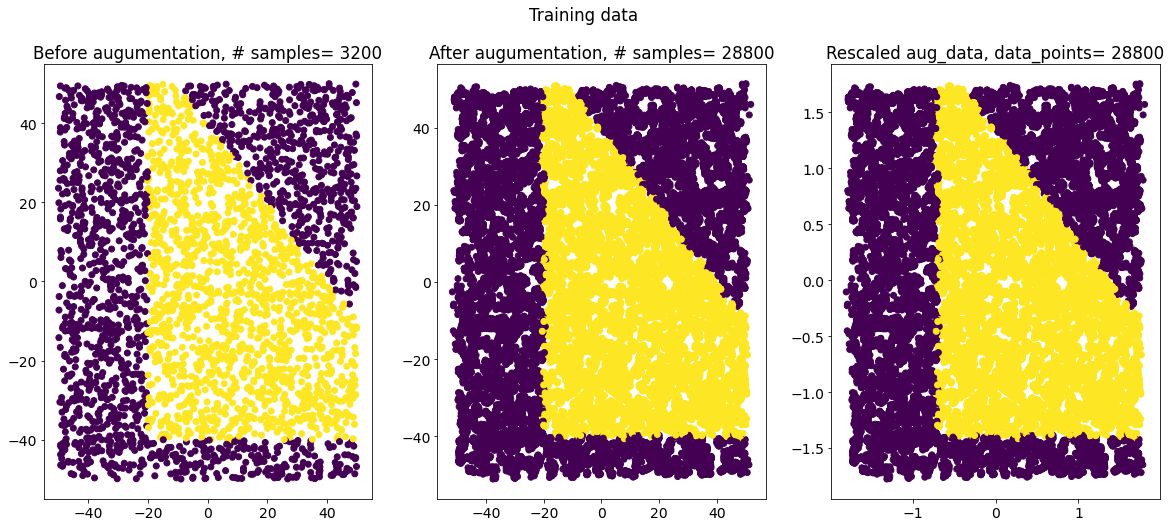

In [7]:
#Now we rescale the data, so that is has mean 0 and standard deviation 1
x_aug_train= np.copy(x_aug)

x_aug_train[:,0] = (x_aug[:,0]-x_aug[:,0].mean())/np.sqrt(x_aug[:,0].var())
x_aug_train[:,1] = (x_aug[:,1]-x_aug[:,1].mean())/np.sqrt(x_aug[:,1].var())


#And we also rescale the validation
x_validation[:,0] = (x_validation[:,0]-x_validation[:,0].mean())/np.sqrt(x_validation[:,0].var())
x_validation[:,1] = (x_validation[:,1]-x_validation[:,1].mean())/np.sqrt(x_validation[:,1].var())



print('x1_aug min:', x_aug[:,0].min(), 'x1_aug max:', x_aug[:,0].max())
print('x2_aug min:', x_aug[:,1].min(), 'x2_aug max:', x_aug[:,1].max())
print('x1_aug_train min:', x_aug_train[:,0].min(), 'x1_aug_train max:', x_aug_train[:,0].max())
print('x2_aug_train min:', x_aug_train[:,1].min(), 'x2_aug_train max:', x_aug_train[:,1].max())

#Now we need to plot the augumented data

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,8))
fig.suptitle('Training data')
ax1.scatter(x[:,0], x[:,1], c = y)
ax1.set_title('Before augumentation, # samples= {}'.format(len(x)))
ax2.scatter(x_aug[:,0], x_aug[:,1], c = y_aug)
ax2.set_title('After augumentation, # samples= {}'.format(len(x_aug)))
ax3.scatter(x_aug_train[:,0], x_aug_train[:,1], c = y_aug)
ax3.set_title('Rescaled aug_data, data_points= {}'.format(len(x_aug)))
#plt.savefig('augumentation3x.png')
plt.show()

# This is the average distance between all points, what we actually want is closest neighbors.
# But by dividing the average distance by the number of points, assuming uniformly distributed points, 
# we get a small quantity that sort of represents the distance that any single point has to 
# its closest neighbors.

def dist(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

points = list(zip(x[:,0], x[:,1]))

distances = [dist(p1, p2) for p1, p2 in combinations(points, 2)]

avg_distance_maybe = (sum(distances) / len(distances))/len(x)
print(avg_distance_maybe)

In [8]:
#Define model with keras

np.random.seed(12345)

CASE=1

if CASE==1: 
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation = 'relu'))
    model.add(Dense(20, activation = 'relu'))
    model.add(Dense(20, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'sigmoid'))
    nepoch = 400
    
if CASE==2: 
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation = 'relu')) #input layer
    model.add(Dense(3, activation = 'relu')) #add first hidden layer
    model.add(Dense(1, activation = 'sigmoid')) #add second hidden layer
    nepoch = 400
    


In [9]:
#Define optimization method and cost function

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
#Training step

fit = model.fit(x_aug_train, y_aug, epochs = nepoch, batch_size = 50,
                validation_data = (x_validation, y_validation), verbose = 2)

Epoch 1/400
576/576 - 2s - loss: 0.5532 - accuracy: 0.6769 - val_loss: 0.4758 - val_accuracy: 0.7362 - 2s/epoch - 4ms/step
Epoch 2/400
576/576 - 1s - loss: 0.4338 - accuracy: 0.7890 - val_loss: 0.4058 - val_accuracy: 0.8100 - 507ms/epoch - 880us/step
Epoch 3/400
576/576 - 1s - loss: 0.3479 - accuracy: 0.8508 - val_loss: 0.3084 - val_accuracy: 0.8712 - 657ms/epoch - 1ms/step
Epoch 4/400
576/576 - 1s - loss: 0.2524 - accuracy: 0.9037 - val_loss: 0.2493 - val_accuracy: 0.8875 - 617ms/epoch - 1ms/step
Epoch 5/400
576/576 - 1s - loss: 0.2194 - accuracy: 0.9101 - val_loss: 0.2324 - val_accuracy: 0.8938 - 613ms/epoch - 1ms/step
Epoch 6/400
576/576 - 1s - loss: 0.2015 - accuracy: 0.9136 - val_loss: 0.2133 - val_accuracy: 0.9000 - 648ms/epoch - 1ms/step
Epoch 7/400
576/576 - 1s - loss: 0.1886 - accuracy: 0.9174 - val_loss: 0.2067 - val_accuracy: 0.9013 - 637ms/epoch - 1ms/step
Epoch 8/400
576/576 - 1s - loss: 0.1820 - accuracy: 0.9192 - val_loss: 0.2108 - val_accuracy: 0.8950 - 515ms/epoch - 89

Epoch 65/400
576/576 - 1s - loss: 0.1567 - accuracy: 0.9259 - val_loss: 0.1807 - val_accuracy: 0.9125 - 580ms/epoch - 1ms/step
Epoch 66/400
576/576 - 1s - loss: 0.1570 - accuracy: 0.9261 - val_loss: 0.1684 - val_accuracy: 0.9212 - 532ms/epoch - 923us/step
Epoch 67/400
576/576 - 1s - loss: 0.1569 - accuracy: 0.9258 - val_loss: 0.1827 - val_accuracy: 0.9150 - 574ms/epoch - 997us/step
Epoch 68/400
576/576 - 1s - loss: 0.1577 - accuracy: 0.9254 - val_loss: 0.1766 - val_accuracy: 0.9175 - 543ms/epoch - 942us/step
Epoch 69/400
576/576 - 1s - loss: 0.1569 - accuracy: 0.9260 - val_loss: 0.2067 - val_accuracy: 0.9100 - 557ms/epoch - 967us/step
Epoch 70/400
576/576 - 1s - loss: 0.1571 - accuracy: 0.9257 - val_loss: 0.1766 - val_accuracy: 0.9162 - 559ms/epoch - 971us/step
Epoch 71/400
576/576 - 1s - loss: 0.1564 - accuracy: 0.9260 - val_loss: 0.1743 - val_accuracy: 0.9150 - 557ms/epoch - 967us/step
Epoch 72/400
576/576 - 1s - loss: 0.1571 - accuracy: 0.9255 - val_loss: 0.1798 - val_accuracy: 0.91

Epoch 129/400
576/576 - 1s - loss: 0.1449 - accuracy: 0.9346 - val_loss: 0.1607 - val_accuracy: 0.9325 - 559ms/epoch - 971us/step
Epoch 130/400
576/576 - 1s - loss: 0.1427 - accuracy: 0.9351 - val_loss: 0.1614 - val_accuracy: 0.9300 - 555ms/epoch - 963us/step
Epoch 131/400
576/576 - 1s - loss: 0.1412 - accuracy: 0.9345 - val_loss: 0.1524 - val_accuracy: 0.9312 - 580ms/epoch - 1ms/step
Epoch 132/400
576/576 - 1s - loss: 0.1395 - accuracy: 0.9351 - val_loss: 0.1558 - val_accuracy: 0.9300 - 542ms/epoch - 942us/step
Epoch 133/400
576/576 - 1s - loss: 0.1372 - accuracy: 0.9372 - val_loss: 0.1651 - val_accuracy: 0.9375 - 545ms/epoch - 945us/step
Epoch 134/400
576/576 - 1s - loss: 0.1363 - accuracy: 0.9377 - val_loss: 0.1765 - val_accuracy: 0.9325 - 539ms/epoch - 936us/step
Epoch 135/400
576/576 - 1s - loss: 0.1344 - accuracy: 0.9394 - val_loss: 0.1487 - val_accuracy: 0.9425 - 515ms/epoch - 895us/step
Epoch 136/400
576/576 - 1s - loss: 0.1340 - accuracy: 0.9424 - val_loss: 0.1469 - val_accura

Epoch 193/400
576/576 - 1s - loss: 0.0511 - accuracy: 0.9797 - val_loss: 0.0421 - val_accuracy: 0.9887 - 604ms/epoch - 1ms/step
Epoch 194/400
576/576 - 1s - loss: 0.0502 - accuracy: 0.9817 - val_loss: 0.0460 - val_accuracy: 0.9812 - 542ms/epoch - 941us/step
Epoch 195/400
576/576 - 1s - loss: 0.0495 - accuracy: 0.9806 - val_loss: 0.0453 - val_accuracy: 0.9850 - 582ms/epoch - 1ms/step
Epoch 196/400
576/576 - 1s - loss: 0.0471 - accuracy: 0.9817 - val_loss: 0.0386 - val_accuracy: 0.9850 - 561ms/epoch - 973us/step
Epoch 197/400
576/576 - 1s - loss: 0.0479 - accuracy: 0.9821 - val_loss: 0.0419 - val_accuracy: 0.9825 - 545ms/epoch - 947us/step
Epoch 198/400
576/576 - 1s - loss: 0.0471 - accuracy: 0.9819 - val_loss: 0.0487 - val_accuracy: 0.9800 - 557ms/epoch - 966us/step
Epoch 199/400
576/576 - 1s - loss: 0.0471 - accuracy: 0.9817 - val_loss: 0.0687 - val_accuracy: 0.9675 - 580ms/epoch - 1ms/step
Epoch 200/400
576/576 - 1s - loss: 0.0514 - accuracy: 0.9797 - val_loss: 0.0815 - val_accuracy: 

Epoch 257/400
576/576 - 1s - loss: 0.0390 - accuracy: 0.9853 - val_loss: 0.0521 - val_accuracy: 0.9750 - 584ms/epoch - 1ms/step
Epoch 258/400
576/576 - 1s - loss: 0.0392 - accuracy: 0.9856 - val_loss: 0.0613 - val_accuracy: 0.9712 - 579ms/epoch - 1ms/step
Epoch 259/400
576/576 - 1s - loss: 0.0401 - accuracy: 0.9845 - val_loss: 0.0555 - val_accuracy: 0.9800 - 582ms/epoch - 1ms/step
Epoch 260/400
576/576 - 1s - loss: 0.0367 - accuracy: 0.9856 - val_loss: 0.0440 - val_accuracy: 0.9800 - 559ms/epoch - 970us/step
Epoch 261/400
576/576 - 1s - loss: 0.0364 - accuracy: 0.9860 - val_loss: 0.0419 - val_accuracy: 0.9762 - 559ms/epoch - 971us/step
Epoch 262/400
576/576 - 1s - loss: 0.0397 - accuracy: 0.9850 - val_loss: 0.0709 - val_accuracy: 0.9700 - 545ms/epoch - 946us/step
Epoch 263/400
576/576 - 0s - loss: 0.0396 - accuracy: 0.9842 - val_loss: 0.0295 - val_accuracy: 0.9862 - 497ms/epoch - 863us/step
Epoch 264/400
576/576 - 1s - loss: 0.0362 - accuracy: 0.9860 - val_loss: 0.0478 - val_accuracy: 

Epoch 321/400
576/576 - 1s - loss: 0.0370 - accuracy: 0.9856 - val_loss: 0.0417 - val_accuracy: 0.9787 - 579ms/epoch - 1ms/step
Epoch 322/400
576/576 - 1s - loss: 0.0372 - accuracy: 0.9856 - val_loss: 0.0432 - val_accuracy: 0.9837 - 559ms/epoch - 970us/step
Epoch 323/400
576/576 - 1s - loss: 0.0353 - accuracy: 0.9864 - val_loss: 0.0506 - val_accuracy: 0.9737 - 540ms/epoch - 937us/step
Epoch 324/400
576/576 - 1s - loss: 0.0385 - accuracy: 0.9848 - val_loss: 0.0580 - val_accuracy: 0.9700 - 564ms/epoch - 979us/step
Epoch 325/400
576/576 - 1s - loss: 0.0380 - accuracy: 0.9858 - val_loss: 0.0490 - val_accuracy: 0.9800 - 579ms/epoch - 1ms/step
Epoch 326/400
576/576 - 1s - loss: 0.0352 - accuracy: 0.9867 - val_loss: 0.0654 - val_accuracy: 0.9737 - 507ms/epoch - 881us/step
Epoch 327/400
576/576 - 1s - loss: 0.0365 - accuracy: 0.9856 - val_loss: 0.0494 - val_accuracy: 0.9800 - 582ms/epoch - 1ms/step
Epoch 328/400
576/576 - 1s - loss: 0.0347 - accuracy: 0.9860 - val_loss: 0.0431 - val_accuracy: 

Epoch 385/400
576/576 - 1s - loss: 0.0324 - accuracy: 0.9868 - val_loss: 0.0409 - val_accuracy: 0.9825 - 544ms/epoch - 945us/step
Epoch 386/400
576/576 - 1s - loss: 0.0310 - accuracy: 0.9883 - val_loss: 0.0287 - val_accuracy: 0.9875 - 541ms/epoch - 939us/step
Epoch 387/400
576/576 - 1s - loss: 0.0354 - accuracy: 0.9865 - val_loss: 0.0599 - val_accuracy: 0.9750 - 563ms/epoch - 978us/step
Epoch 388/400
576/576 - 1s - loss: 0.0354 - accuracy: 0.9864 - val_loss: 0.0914 - val_accuracy: 0.9675 - 586ms/epoch - 1ms/step
Epoch 389/400
576/576 - 1s - loss: 0.0324 - accuracy: 0.9876 - val_loss: 0.0489 - val_accuracy: 0.9812 - 581ms/epoch - 1ms/step
Epoch 390/400
576/576 - 1s - loss: 0.0332 - accuracy: 0.9874 - val_loss: 0.0393 - val_accuracy: 0.9850 - 577ms/epoch - 1ms/step
Epoch 391/400
576/576 - 1s - loss: 0.0358 - accuracy: 0.9860 - val_loss: 0.0730 - val_accuracy: 0.9762 - 599ms/epoch - 1ms/step
Epoch 392/400
576/576 - 1s - loss: 0.0330 - accuracy: 0.9878 - val_loss: 0.0339 - val_accuracy: 0.

In [11]:
validation_loss = np.array(fit.history['val_loss'])
training_loss = np.array(fit.history['loss'])

t = 0
while(t==0 & (len(training_loss)!=0)):
    index = np.argmin(training_loss)
    if fit.history['loss'][index] >= fit.history['val_loss'][index]:
        index_of_best_model = index
        t = 1
        print(index)
    else:
        training_loss = np.delete(training_loss, index)


        
        
        
        
list_of_best_index[N_list.index(len(x_aug))] = index_of_best_model

list_of_Trainloss_best_epoch[N_list.index(len(x_aug))] = fit.history['loss'][index_of_best_model]
list_of_Validloss_best_epoch[N_list.index(len(x_aug))] = fit.history['val_loss'][index_of_best_model]


list_of_Trainloss_last[N_list.index(len(x_aug))]=fit.history['loss'][-1]
list_of_Validloss_last[N_list.index(len(x_aug))]=fit.history['val_loss'][-1]


print(list_of_Trainloss_best_epoch)
print(list_of_Validloss_best_epoch)
print(list_of_best_index)
#print(np.argmin(validation_loss))
#print(validation_loss[np.argmin(validation_loss)])
#print(fit.history['val_loss'][np.argmin(validation_loss)])

#best metric is validation loss. 

#whole_arr = np.column_stack((train_loss, difference))
#print(np.argmin(whole_arr, axis = 0))

385
[0, 0, 0, 0, 0, 0, 0.03099604696035385, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0.028662407770752907, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 385, 0, 0, 0]


Text(0.5, 1.0, 'Augumented 28800')

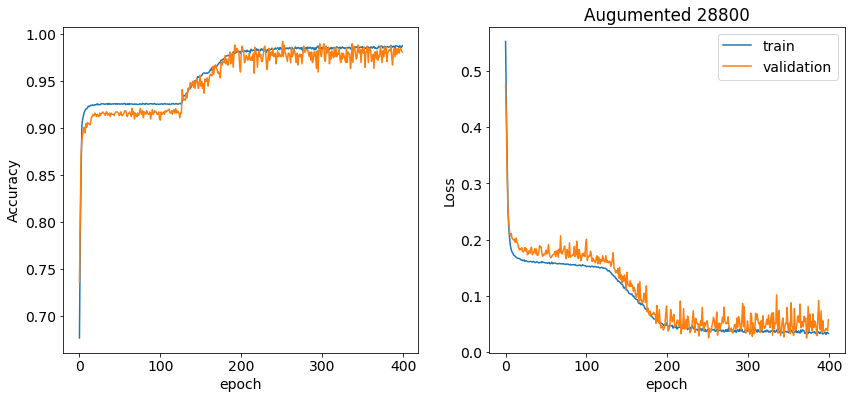

In [12]:
#Plot training and vaòlidation errors

fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="validation")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="validation")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
plt.title('Augumented '+str(len(x_aug)))
#plt.savefig('plot_of_augumented' + str(len(x_aug)) + '.png')

In [13]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(X1)
print(len(X1),len(grid))
print(grid)

# RESCALE

grid_r = grid/(50/x_aug_train[:,1].max())
#Before the rescaling was dividing by 50 because the data went from 
# -1 to 1 in all directions. We have reajusted the rescaling of the grid according
#to the rescaled data.
print(grid_r)
pred = model.predict(grid_r)

[-50 -48 -46 -44 -42 -40 -38 -36 -34 -32 -30 -28 -26 -24 -22 -20 -18 -16
 -14 -12 -10  -8  -6  -4  -2   0   2   4   6   8  10  12  14  16  18  20
  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50]
51 2601
[[-50. -50.]
 [-48. -50.]
 [-46. -50.]
 ...
 [ 46.  50.]
 [ 48.  50.]
 [ 50.  50.]]
[[-1.75574742 -1.75574742]
 [-1.68551752 -1.75574742]
 [-1.61528762 -1.75574742]
 ...
 [ 1.61528762  1.75574742]
 [ 1.68551752  1.75574742]
 [ 1.75574742  1.75574742]]


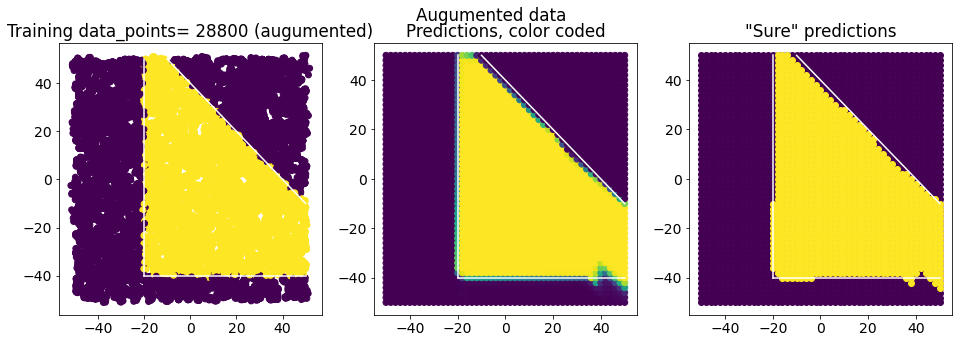

In [14]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w") #vertical line
    ax.plot((-20,50),(-40,-40),c="w") #horizontal line 
    ax.plot((-10,50),(50,-10),c="w")  #inclined line
fig,AX=plt.subplots(1,3,figsize=(16,5.))
fig.suptitle("Augumented data")
ax=AX[0]
ax.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
ax.set_title( 'Training data_points= {} (augumented)'.format(len(x_aug)))
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title('Predictions, color coded')
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154") #all points
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725") #only points for which model is >0.5 sure of label
ax.set_title('\"Sure\" predictions')
boundaries()
plt.show()

In [15]:

print(list_of_Trainloss_best_epoch)

[0, 0, 0, 0, 0, 0, 0.03099604696035385, 0, 0, 0]


([<matplotlib.axis.YTick at 0x7fae8089b8b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

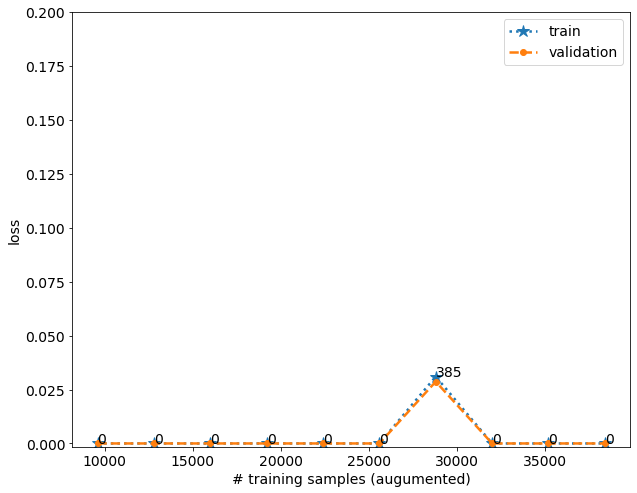

In [16]:

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(N_list, list_of_Trainloss_best_epoch, label = 'train', linestyle = 'dotted', marker = '*', markersize = 12,linewidth ='2.5')
ax.plot(N_list, list_of_Validloss_best_epoch, label = 'validation',linestyle = 'dashed', marker = '.',markersize = 12, linewidth ='2.5')
ax.set_xlabel('# training samples (augumented)')
ax.set_ylabel('loss')
for i, txt in enumerate(list_of_best_index):
    ax.annotate(txt, xy = (N_list[i], list_of_Trainloss_best_epoch[i]))
plt.legend(loc = 'best')
plt.yticks([0.000, 0.025, 0.050, 0.075, 0.100, 0.125, 0.150, 0.175, 0.200])
#plt.savefig('best_epoch_true_aug_ticks.png')



([<matplotlib.axis.YTick at 0x7fae844fca90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

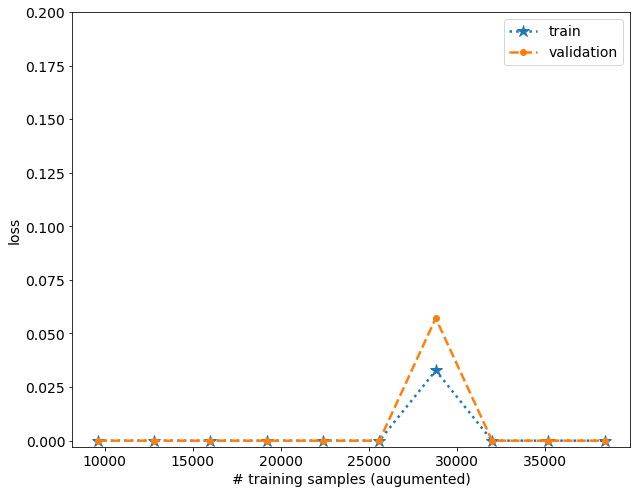

In [17]:
fig1, ax1 = plt.subplots(figsize = (10,8))
ax1.plot(N_list, list_of_Trainloss_last, label = 'train', linestyle = 'dotted', marker = '*', markersize = 12,linewidth ='2.5')
ax1.plot(N_list, list_of_Validloss_last, label = 'validation',linestyle = 'dashed', marker = '.',markersize = 12, linewidth ='2.5')
ax1.set_xlabel('# training samples (augumented)')
ax1.set_ylabel('loss')
plt.legend(loc = 'best')
plt.yticks([0.000, 0.025, 0.050, 0.075, 0.100, 0.125, 0.150, 0.175, 0.200])
#plt.savefig('last_epoch_true_aug_ticks.png')